# Project : Exploratory Data Analysis (EDA) on Sales Data

## Introduction:

This report presents a detailed analysis of GlobalMart’s sales performance across different product categories, regions, and time periods. It aims to uncover key trends, patterns, and relationships within the sales data from 2012 to 2015. By examining average units sold, regional distribution, seasonal fluctuations, and the correlation between discounts and profit, the report offers valuable insights into the company’s operational strengths and areas needing improvement. Understanding these dynamics is essential for making informed decisions about pricing strategies, resource allocation, and market targeting. The findings serve as a foundation for optimizing overall business performance and future strategic planning. I will be working with the "Global Superstore Dataset" (available on Kaggle).


## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## 2. Load the Dataset

In [3]:
df= pd.read_csv("Global_Superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


## 3. Data Exploration

In [4]:
df.shape

(1000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


## 4. Data Cleaning

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [8]:
df.isna().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [9]:
df = df.dropna(subset=["Postal Code"]) 

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
8,40099,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.0,54.71,25.27,High
9,36258,CA-2012-AB10015140-40974,3/6/2012,3/7/2012,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.2,5.48,11.13,High
10,36259,CA-2012-AB10015140-40974,3/6/2012,3/7/2012,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,OFF-AR-5309,Office Supplies,Art,Newell 330,17.94,3,0.0,4.66,4.29,High
16,39519,CA-2012-AB10015140-40958,2/19/2012,2/25/2012,Standard Class,AB-100151402,Aaron Bergman,Consumer,76017.0,Arlington,...,OFF-ST-3078,Office Supplies,Storage,Akro Stacking Bins,12.62,2,0.2,-2.52,1.97,Low


In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

## Basic Analysis

In [12]:
Total_Sales = df["Sales"].sum()
print("Total Sales:", Total_Sales)

Total Sales: 54535.08


In [13]:
Total_Profit = df["Profit"].sum()
print("Total Profit:", Total_Profit)

Total Profit: 12063.97


In [14]:
df.groupby("Product Name")["Sales"].sum().sort_values(ascending = False).head(5).reset_index()

,Product Name,Sales
0,GBC Ibimaster 500 Manual ProClick Binding System,9892.74
1,GBC DocuBind P400 Electric Binding System,4355.17
2,Canon Image Class D660 Copier,2999.95
3,GBC DocuBind 300 Electric Binding Machine,2419.51
4,Hon 5100 Series Wood Tables,2036.86


In [15]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending = False).reset_index()
sales_by_region

,Region,Sales
0,Central US,17187.94
1,Western US,16729.95
2,Eastern US,12256.44
3,Southern US,8360.75


In [ ]:
sales_and_profit = df.loc[:,["Sales", "Profit"]]
sales_and_profit

,Sales,Profit
0,221.98,62.15
8,341.96,54.71
9,48.71,5.48
10,17.94,4.66
16,12.62,-2.52
...,...,...
974,1292.94,77.58
976,275.97,11.04
990,545.88,70.96
992,164.88,80.79


In [17]:
correlation = df["Sales"].corr(df["Profit"])
print("Correlation between Sales and Profit", correlation)

Correlation between Sales and Profit 0.9313979948257132


## Data Visualisation

### Average Sales Across Different Categories

In [18]:
Category_Sales= df.groupby("Category")["Sales"].mean()
Category_Sales

Category
Furniture          370.033611
Office Supplies    227.845159
Technology         390.793125
Name: Sales, dtype: float64

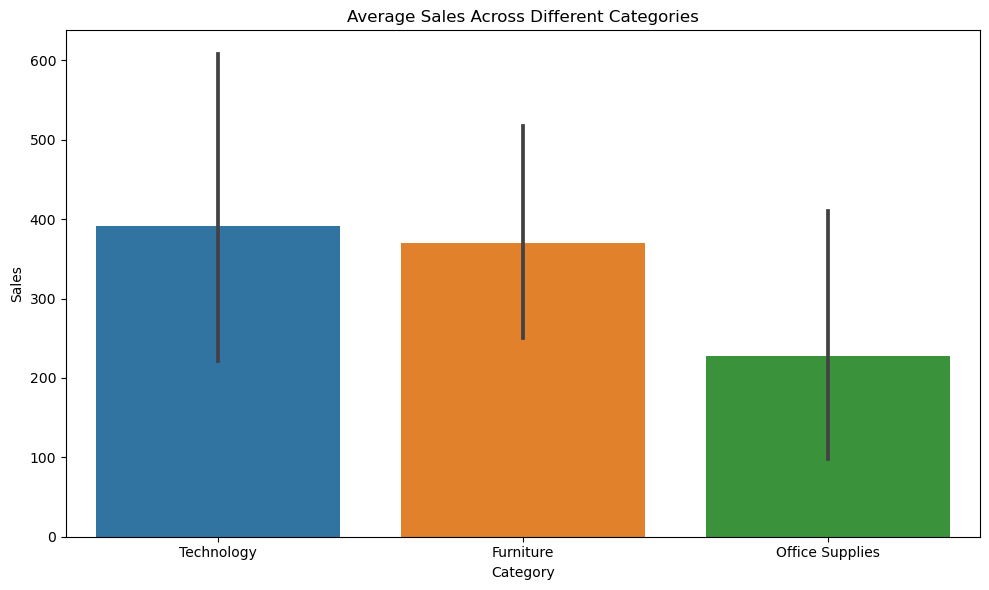

In [19]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x="Category", y="Sales", data = df)

ax.set_title("Average Sales Across Different Categories")
fig.tight_layout()
plt.show()

Out of all three categories, Technology is seen to be the best selling out of them all with about 400  units sold on average, closely followed by the furniture category. Office supplies have the lowest sales among the three categories with about 250 units sold on average. Technology shows the highest sales and variability whereas Office Supplies show consistent but lower performance. This insight reveals the company's strength and potential areas for improvement. Further analysis of sales patterns could help optimize GlobalMart's  product strategy and resource allocation.

### Sales across different Categories: 



### Monthly Sales:

In [20]:
df["Month-Year"] = df["Order Date"].dt.to_period("M")

In [21]:
monthly_sales = df.groupby("Month-Year")["Sales"].sum()
monthly_sales.head()

Month-Year
2012-02      12.62
2012-03    1015.15
2012-04     257.75
2012-05     287.46
2012-07     324.92
Freq: M, Name: Sales, dtype: float64

In [22]:
monthly_sales.index = monthly_sales.index.to_timestamp()

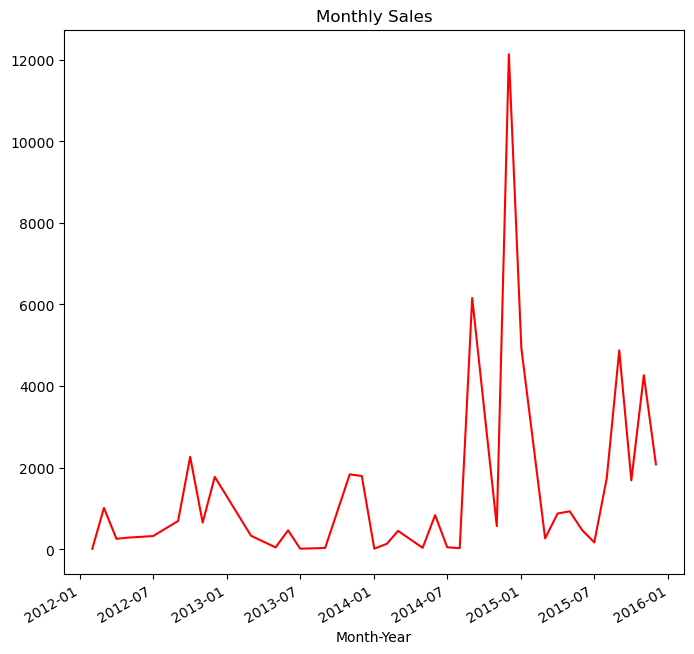

In [23]:
fig, ax = plt.subplots(figsize = (8,8))


monthly_sales.plot(kind = "line", color = "red")

plt.title("Monthly Sales")
plt.show()

The line chart above depicts the monthly sales from the Globalmart data set from February, 2012 until December of 2015. It is clear that the line chart fluctuates a fair amount throughout the months however there are clear trends. Sales seem to spike during the festive period, customers spend quite a lot on gifts in time for Christmas hence the increase in sales. The increase in discounted products during the black Friday period  could also be the reason in the drive of sales in the last quarter of the year. The first quarter of each year shows limited sales possibly due to customers recuperating their losses from the money spent during the festive season. There is a general upward trend as time goes on, however there is a noticeable spike higher than other point in the timeline reaching about 12000 units.

## Profit vs Sales:

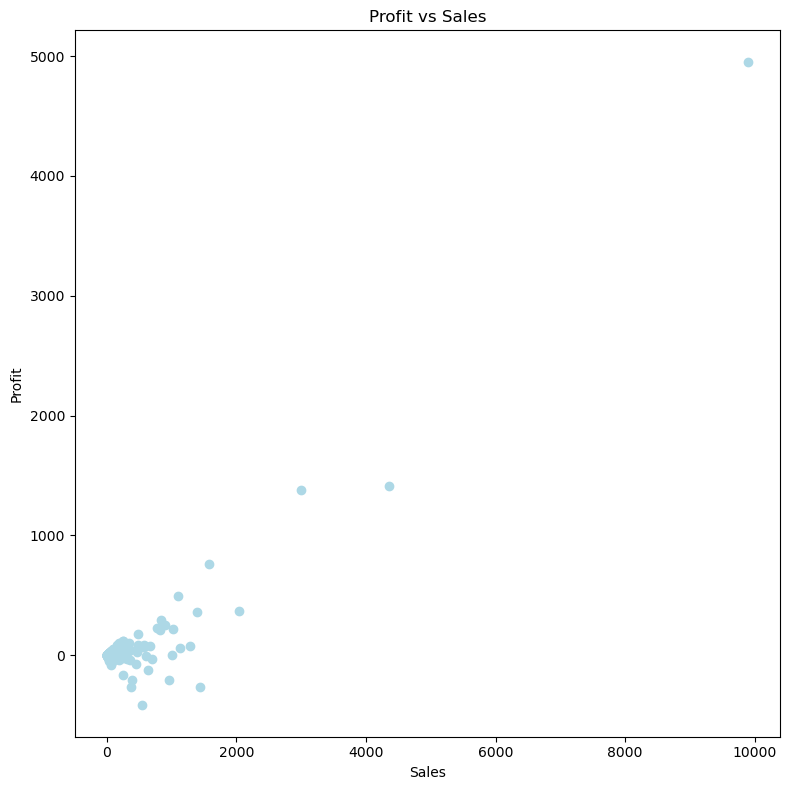

In [92]:
fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(df["Sales"], df["Profit"], color = "lightblue")
ax.set_title("Profit vs Sales")
ax.set_xlabel("Sales")
ax.set_ylabel("Profit")

fig.tight_layout()
plt.show()

The scatter graph above shows the relationship between product sales and profit. There is a general positive correlation between the two numerical variables however between sales of 0 and 2000 there are some points which display a negative profit. This may be due to large amounts of discounts applied to some of the products resulting in this product no being profitable. After sales amount of 2000, it is clear that as sales increase profitability inevitably does so.

### Sales by Region and Category:

In [93]:
pivot = df.pivot_table(index = "Region", columns = "Category", values = "Sales", aggfunc = "sum")

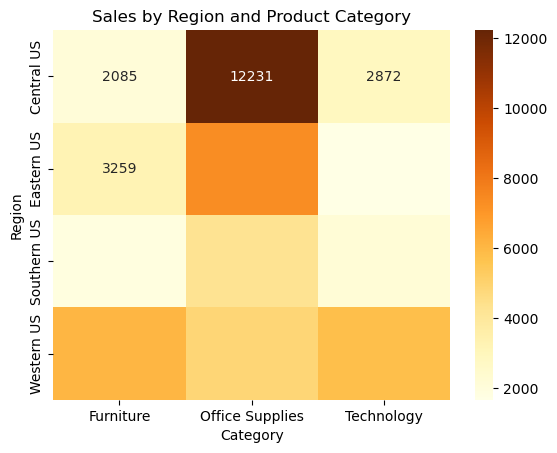

In [98]:
sns.heatmap(pivot, annot=True, fmt = ".0f", cmap = "YlOrBr")
plt.title("Sales by Region and Product Category")
plt.show()

The heat map above shows the compares the amounts of sales between between the categories of the products and the regions in the United States. It is evident that Furniture and Technology do their best in Western US compared to other regions with sales of about 6000 units compared to central US where they sell 2085 and 2872 units respectively. Although selling around 5000 in Western and Southern US, Office Supplies sales tend to do well in the Eastern and Central Regions in the US with upwards of 12000 in Central US regions. This regional variation suggests tailored strategies may be needed for each market to optimize sales performance.

### Time Series Analysis

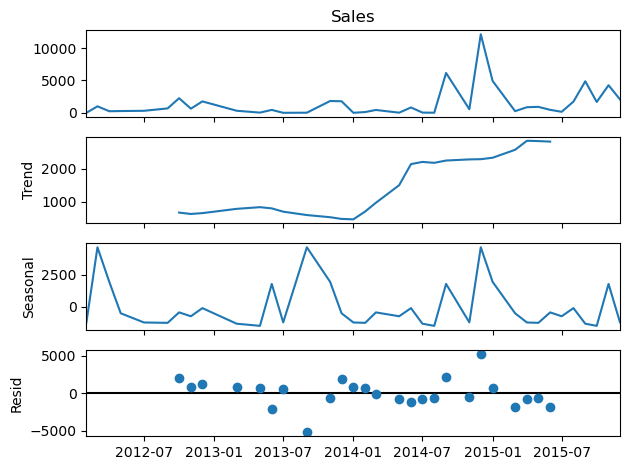

Total Discount: 29.95,
Total Profit: $12063.97,
Correlation between discount and profit: -0.16262271039478665


In [103]:
result = seasonal_decompose(monthly_sales, model = "additive", period=12)
result.plot()
plt.show()

total_discount = df["Discount"].sum()
total_profit = df["Profit"].sum()

df["Discount"] = pd.to_numeric(df["Discount"], errors = "coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors = "coerce")

discount_profit_corr = df[["Discount", "Profit"]].corr().iloc[0,1]

print(f"Total Discount: {total_discount},\n"
      f"Total Profit: ${total_profit},\n"
      f"Correlation between discount and profit: {discount_profit_corr}")


#### Sales or Seasonality trends:
Sales show an overall increasing trend from 2012 to 2015, with significant volatility. A major sales spike occurs in early 2015, followed by continued fluctuations. Seasonal patterns are evident, with recurring peaks and troughs throughout the years. The trend line indicated a sharp increase in sales around mid-2014, which then stabilizes at a higher level through 2015.

GlobalMart shows a correlation of -0.16 between discounts and profit which indicated a weak inverse relationship between the two. As discounts increase, profits decrease slightly, but the effects aren't strong. This suggests the current discount strategy minimally impacts overall profitability but further analysis  could optimize pricing for better results. The company might want to investigate if there are specific products or customer segments where discounts are more or less effective.

## Summary

The analysis of GlobalMart’s sales performance reveals key insights across product categories, regional demand, and profitability trends. Among the three major categories—Technology, Furniture, and Office Supplies—Technology emerges as the top performer, averaging around 400 units sold, followed closely by Furniture. Office Supplies lag behind with approximately 250 units sold on average. While Technology exhibits the highest sales and variability, Office Supplies maintain steady but lower performance, suggesting potential for growth through targeted initiatives.

A scatter plot analyzing sales versus profit indicates a generally positive correlation, though notable exceptions occur with sales under 2000 units, where some products incur losses. This may be due to high discounting, which undermines profitability. Beyond the 2000-unit threshold, profitability tends to increase alongside sales, emphasizing the importance of volume in revenue generation.

Regional sales analysis via a heat map shows strong performance for Furniture and Technology in the Western U.S., each reaching approximately 6000 units. In contrast, Office Supplies perform well in the Central and Eastern regions, surpassing 12,000 units in Central U.S., highlighting the importance of region-specific sales strategies.

Seasonality also plays a role, with sales trending upward from 2012 to 2015, including a sharp increase in mid-2014 and a major spike in early 2015. Despite fluctuations, the overall trend remains positive.

Lastly, the correlation between discounts and profit is weakly negative (-0.16), suggesting that current discount strategies slightly reduce profit. However, further investigation could help fine-tune pricing strategies to improve efficiency and profitability across segments.